In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from config import geoapify_key
import json
import requests
from pprint import pprint
import hvplot.pandas

In [46]:
county_data=pd.read_csv("./Resources/pop_density_NYcountycensus_1970-2020.csv")

county_datax=county_data.fillna(0)
county_datax.head()

,FIPS Code,Geography,Year,Program Type,Population,County,Land Area (sq mi.),Population Density (person/sq.mi.),Population Growth Rate(10yr),Annual Population Growth Rate,2-Year Growth Rate,3-Year Growth Rate,4-Year Growth Rate,5-Year Growth Rate
0,36001.0,Albany County,1970.0,Census Base Population,286742.0,Albany,522.8,548.473604,0.000000,0.0,0.0,0.0,0.0,0.0
1,36001.0,Albany County,1980.0,Census Base Population,285909.0,Albany,522.8,546.880260,-0.002905,0.0,0.0,0.0,0.0,0.0
2,36001.0,Albany County,1990.0,Census Base Population,292812.0,Albany,522.8,560.084162,0.024144,0.0,0.0,0.0,0.0,0.0
3,36001.0,Albany County,2000.0,Census Base Population,294601.0,Albany,522.8,563.506121,0.006110,0.0,0.0,0.0,0.0,0.0
4,36001.0,Albany County,2010.0,Census Base Population,304199.0,Albany,522.8,581.864958,0.032580,0.0,0.0,0.0,0.0,0.0


In [47]:
county_data1=county_datax.groupby(["Geography","Year"]).mean()
county_data2=county_data1.reset_index()
land_location=pd.DataFrame({"Geography":county_data2["Geography"],"Year":county_data2["Year"],\
                            "Land Area (sq mi.)":county_data2["Land Area (sq mi.)"],"Population":county_data2["Population"],\
                            "Population Density (person/sq.mi.)":county_data2["Population Density (person/sq.mi.)"]})

land_location

,Geography,Year,Land Area (sq mi.),Population,Population Density (person/sq.mi.)
0,0,0.0,0.00,0.0,0.000000
1,Albany County,1970.0,522.80,286742.0,548.473604
2,Albany County,1980.0,522.80,285909.0,546.880260
3,Albany County,1990.0,522.80,292812.0,560.084162
4,Albany County,2000.0,522.80,294601.0,563.506121
...,...,...,...,...,...
374,Yates County,1980.0,338.14,21459.0,63.461880
375,Yates County,1990.0,338.14,22810.0,67.457266
376,Yates County,2000.0,338.14,24591.0,72.724315
377,Yates County,2010.0,338.14,25364.0,75.010351


In [4]:
url="https://api.geoapify.com/v1/geocode/search?"

counties=land_location["Geography"]
longitude=[]
latitude=[]

for county in counties:
    params = {  
        "text":county,
        "state":"New York",
        "apiKey": geoapify_key,
    
        }
    response=requests.get(url,params=params).json()
    longitude.append(response["features"][0]["properties"]["lon"])
    latitude.append(response["features"][0]["properties"]["lat"])

land_location["Longitude"]=longitude   
land_location["Latitude"]=latitude
land_location

,Geography,Year,Land Area (sq mi.),Population,Population Density (person/sq.mi.),Longitude,Latitude
0,Albany County,1970.0,522.80,286742.0,548.473604,-73.984400,42.598690
1,Albany County,1980.0,522.80,285909.0,546.880260,-73.984400,42.598690
2,Albany County,1990.0,522.80,292812.0,560.084162,-73.984400,42.598690
3,Albany County,2000.0,522.80,294601.0,563.506121,-73.984400,42.598690
4,Albany County,2010.0,522.80,304199.0,581.864958,-73.984400,42.598690
...,...,...,...,...,...,...,...
373,Yates County,1980.0,338.14,21459.0,63.461880,-77.112177,42.644444
374,Yates County,1990.0,338.14,22810.0,67.457266,-77.112177,42.644444
375,Yates County,2000.0,338.14,24591.0,72.724315,-77.112177,42.644444
376,Yates County,2010.0,338.14,25364.0,75.010351,-77.112177,42.644444


In [5]:
land_location2=land_location.loc[land_location["Year"]==2020,:]
land_location2.reset_index()

,index,Geography,Year,Land Area (sq mi.),Population,Population Density (person/sq.mi.),Longitude,Latitude
0,5,Albany County,2020.0,522.80,314848.0,602.234124,-73.984400,42.598690
1,11,Allegany County,2020.0,1029.31,46456.0,45.133147,-78.041928,42.244606
2,17,Bronx County,2020.0,42.10,1472654.0,34979.904990,-73.866524,40.850656
3,23,Broome County,2020.0,705.77,198683.0,281.512391,-75.840411,42.145562
4,29,Cattaraugus County,2020.0,1308.35,77042.0,58.884855,-78.647710,42.223482
...,...,...,...,...,...,...,...,...
58,353,Washington County,2020.0,831.18,61302.0,73.752978,-73.447134,43.229454
59,359,Wayne County,2020.0,603.83,91283.0,151.173344,-77.037760,43.150056
60,365,Westchester County,2020.0,430.50,1004457.0,2333.233449,-73.790755,41.176314
61,371,Wyoming County,2020.0,592.75,40531.0,68.377900,-78.241523,42.703981


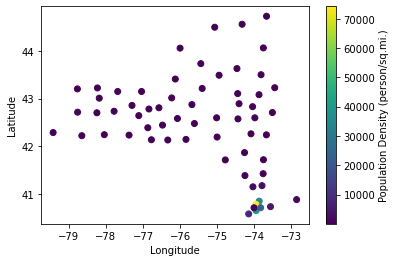

In [6]:

plt.scatter(land_location2['Longitude'],land_location2['Latitude'],c=land_location2['Population Density (person/sq.mi.)'])
clb = plt.colorbar()
plt.xlabel("Longitude")
plt.ylabel("Latitude")
clb.set_label("Population Density (person/sq.mi.)")
plt.show()

In [51]:
# land_location3=land_location.loc[land_location["Year"]==2010,:]
# land_location3.reset_index()
# prev_yr_pop=land_location3["Population"]
# current_yr_pop=land_location2["Population"]
# pop_growth_percentage=[]

# for pop in prev_yr_pop:
#     for pops in current_yr_pop:
#         population_growth_rate=((current_yr_pop-prev_yr_pop)/prev_yr_pop)*100
#         pop_growth_percentage.append(population_growth_rate)
# print(pop_growth_percentage)

In [19]:

land_location2


,Geography,Year,Land Area (sq mi.),Population,Population Density (person/sq.mi.),Longitude,Latitude
5,Albany County,2020.0,522.80,314848.0,602.234124,-73.984400,42.598690
11,Allegany County,2020.0,1029.31,46456.0,45.133147,-78.041928,42.244606
17,Bronx County,2020.0,42.10,1472654.0,34979.904990,-73.866524,40.850656
23,Broome County,2020.0,705.77,198683.0,281.512391,-75.840411,42.145562
29,Cattaraugus County,2020.0,1308.35,77042.0,58.884855,-78.647710,42.223482
...,...,...,...,...,...,...,...
353,Washington County,2020.0,831.18,61302.0,73.752978,-73.447134,43.229454
359,Wayne County,2020.0,603.83,91283.0,151.173344,-77.037760,43.150056
365,Westchester County,2020.0,430.50,1004457.0,2333.233449,-73.790755,41.176314
371,Wyoming County,2020.0,592.75,40531.0,68.377900,-78.241523,42.703981


In [50]:
map_plot=land_location2.hvplot.points("Longitude","Latitude",geo=True,tiles="OSM",frame_width=700,frame_height=500, 
                                    size="Population Density (person/sq.mi.)",color="Geography")

map_plot

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Longitude,Latitude]   (Geography,Population Density (person/sq.mi.))